Импортируем библиотеки

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix , classification_report
import matplotlib.pyplot as plt
import numpy as np
import cv2

import time
from sklearn import metrics

## Препроцессинг данных

In [2]:
#Получаем матрицы с датасета cifar10
(X_trainRGB, y_train), (X_testRGB, y_test) = datasets.cifar10.load_data()

#### Переводим классы из двухмерного в одномерный массив

Для тренировочных данных классов

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train = y_train.reshape(-1,)

In [6]:
y_train.shape

(50000,)

Для тестовых данных классов

In [7]:
y_test.shape

(10000, 1)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
y_test.shape

(10000,)

#### Переводим изображения в черно-белые для последующей передачи в sklearn

Работаем с x_train

In [10]:
X_trainRGB.shape

(50000, 32, 32, 3)

In [11]:
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_trainRGB])

In [12]:
X_train.shape

(50000, 32, 32)

In [13]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])

In [14]:
X_train.shape

(50000, 1024)

Работаем с X_test

In [15]:
X_testRGB.shape

(10000, 32, 32, 3)

In [16]:
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_testRGB])

In [17]:
X_test.shape

(10000, 32, 32)

In [18]:
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [19]:
X_test.shape

(10000, 1024)

#### Нормализация изображений

Для чёрно-белых изображений

In [20]:
X_train  = X_train/255
X_test  = X_test/255

Для RGB

In [21]:
X_trainRGB  = X_trainRGB/255
X_testRGB  = X_testRGB/255

## Работа с в sklearn

Реализация "классических" алогритмов с помощью библиотеки sklearn.<br>Обработка матриц проходит только на CPU, так что надо ОЧЕНЬ долго пождождать

In [20]:
# Реализация метода опорных векторов через SVC
from sklearn import svm

start_time = time.time()
nb = svm.SVC().fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Время выполнения", (time.time()-start_time))

              precision    recall  f1-score   support

           0       0.50      0.47      0.49      1000
           1       0.55      0.54      0.55      1000
           2       0.35      0.32      0.33      1000
           3       0.33      0.28      0.30      1000
           4       0.36      0.44      0.40      1000
           5       0.47      0.37      0.42      1000
           6       0.44      0.55      0.49      1000
           7       0.55      0.47      0.51      1000
           8       0.53      0.60      0.56      1000
           9       0.51      0.56      0.53      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.46     10000
weighted avg       0.46      0.46      0.46     10000

Время выполнения 2039.4892559051514


In [19]:
#Реализация наивного байесовского метода
from sklearn.naive_bayes import MultinomialNB

start_time = time.time()
nb = MultinomialNB().fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Время выполнения", (time.time()-start_time))

              precision    recall  f1-score   support

           0       0.18      0.11      0.13      1000
           1       0.30      0.15      0.20      1000
           2       0.33      0.15      0.21      1000
           3       0.20      0.06      0.10      1000
           4       0.20      0.17      0.18      1000
           5       0.19      0.44      0.27      1000
           6       0.20      0.08      0.12      1000
           7       0.18      0.23      0.21      1000
           8       0.25      0.40      0.31      1000
           9       0.30      0.51      0.37      1000

    accuracy                           0.23     10000
   macro avg       0.23      0.23      0.21     10000
weighted avg       0.23      0.23      0.21     10000

Время выполнения 0.3874680995941162


In [19]:
# Реализация метода k-ближайших соседей
import sklearn.neighbors as neigh

start_time = time.time()
kn = neigh.KNeighborsClassifier(n_neighbors=90, n_jobs=6).fit(X_train,y_train)
y_pred = kn.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Время выполнения", (time.time()-start_time))

              precision    recall  f1-score   support

           0       0.36      0.36      0.36      1000
           1       0.84      0.07      0.13      1000
           2       0.23      0.35      0.28      1000
           3       0.33      0.06      0.10      1000
           4       0.18      0.59      0.27      1000
           5       0.58      0.13      0.21      1000
           6       0.27      0.24      0.25      1000
           7       0.65      0.14      0.23      1000
           8       0.29      0.67      0.40      1000
           9       0.65      0.14      0.23      1000

    accuracy                           0.28     10000
   macro avg       0.44      0.28      0.25     10000
weighted avg       0.44      0.28      0.25     10000

Время выполнения 16.37787103652954


In [ ]:
# Реализация метода опорных векторов через LinearSVC
start_time = time.time()
import sklearn.svm as svm
svect = svm.LinearSVC(max_iter=5000).fit(X_train, y_train)
y_pred = svect.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Время выполнения", (time.time()-start_time))

In [18]:
# Реализация логистической регресси
from sklearn.linear_model import LogisticRegression

start_time = time.time()
logr = LogisticRegression(max_iter=5000, n_jobs=6).fit(X_train, y_train)
y_pred = logr.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Время выполнения", (time.time()-start_time))

              precision    recall  f1-score   support

           0       0.34      0.36      0.35      1000
           1       0.33      0.35      0.34      1000
           2       0.22      0.19      0.21      1000
           3       0.20      0.16      0.18      1000
           4       0.21      0.18      0.20      1000
           5       0.27      0.27      0.27      1000
           6       0.25      0.28      0.27      1000
           7       0.28      0.27      0.28      1000
           8       0.33      0.38      0.36      1000
           9       0.36      0.41      0.39      1000

    accuracy                           0.29     10000
   macro avg       0.28      0.29      0.28     10000
weighted avg       0.28      0.29      0.28     10000

Время выполнения 228.5255832672119


/Users/demg/miniforge3/envs/env_tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Реализация в keras

Реализация алгоритмов глубокого обучения

In [68]:
from keras.utils.vis_utils import plot_model
import visualkeras
import pandas as pd
import numpy as np

#### Строим простую ANN (artificial neural network)

In [69]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

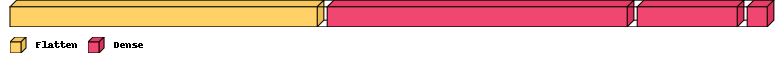

In [70]:
visualkeras.layered_view(ann, legend=True) 

In [71]:
ann.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 3000)              9219000   
                                                                 
 dense_5 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_6 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [72]:
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [73]:
ann.fit(X_trainRGB, y_train, epochs=10)

Epoch 1/10
   4/1563 [..............................] - ETA: 26s - loss: 2.4349 - accuracy: 0.0781 

2022-04-05 00:01:57.338989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 17s 11ms/step - loss: 1.8163 - accuracy: 0.3530
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6260 - accuracy: 0.4262
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5444 - accuracy: 0.4554
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4854 - accuracy: 0.4750
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4338 - accuracy: 0.4961
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3945 - accuracy: 0.5101
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3528 - accuracy: 0.5236
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3174 - accuracy: 0.5373
Epoch 9/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.2852 - accuracy: 0.5487
Epoch 10/10
1563/1563 [==============================] - 18s 11ms/step - lo

In [74]:


y_pred = ann.predict(X_testRGB)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(classification_report(y_test, y_pred_classes))

2022-04-05 00:04:49.736618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

           0       0.72      0.39      0.51      1000
           1       0.76      0.48      0.59      1000
           2       0.35      0.52      0.42      1000
           3       0.31      0.48      0.38      1000
           4       0.45      0.41      0.43      1000
           5       0.47      0.33      0.39      1000
           6       0.64      0.48      0.55      1000
           7       0.59      0.61      0.60      1000
           8       0.63      0.67      0.65      1000
           9       0.52      0.68      0.59      1000

    accuracy                           0.51     10000
   macro avg       0.54      0.51      0.51     10000
weighted avg       0.54      0.51      0.51     10000



Как видим из отчета, точность классификации составляет 50%, что уже больше

In [75]:
print(confusion_matrix(y_test, y_pred_classes))

[[394  15 137  83  44  12  12  47 173  83]
 [  9 484  28  54  10  19  10  31  73 282]
 [ 41  12 524 153 103  43  42  56  14  12]
 [  8   6 126 481  46 141  70  53  20  49]
 [ 19   1 242 114 412  35  58  80  24  15]
 [  5   1 138 300  67 334  48  65  20  22]
 [  1   6 157 142 117  35 484  20  15  23]
 [ 10   5  93  88  69  64   9 615  13  34]
 [ 51  31  36  47  30  14   4  21 665 101]
 [ 11  74  21  72  12  17  15  61  38 679]]


#### Строим cвёрточную нейронную сеть (CNN)

In [76]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

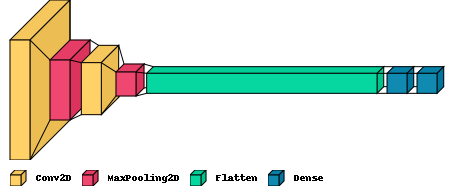

In [77]:
visualkeras.layered_view(cnn, legend=True) 

In [78]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2304)              0         
                                                                 
 dense_7 (Dense)             (None, 64)               

In [79]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [80]:
cnn.fit(X_trainRGB, y_train, epochs=20)

Epoch 1/20
   5/1563 [..............................] - ETA: 21s - loss: 2.3149 - accuracy: 0.1187 

2022-04-05 00:04:53.570931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 17s 11ms/step - loss: 1.4730 - accuracy: 0.4707
Epoch 2/20
1563/1563 [==============================] - 16s 11ms/step - loss: 1.1193 - accuracy: 0.6058
Epoch 3/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9893 - accuracy: 0.6552
Epoch 4/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9024 - accuracy: 0.6870
Epoch 5/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8356 - accuracy: 0.7102
Epoch 6/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7842 - accuracy: 0.7278
Epoch 7/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7341 - accuracy: 0.7435
Epoch 8/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6968 - accuracy: 0.7563
Epoch 9/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6592 - accuracy: 0.7700
Epoch 10/20
1563/1563 [==============================] - 16s 10ms/step - lo

In [81]:
y_pred = cnn.predict(X_testRGB)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(classification_report(y_test, y_pred_classes))

2022-04-05 00:10:12.931737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

           0       0.75      0.72      0.74      1000
           1       0.79      0.81      0.80      1000
           2       0.64      0.52      0.57      1000
           3       0.50      0.52      0.51      1000
           4       0.67      0.55      0.61      1000
           5       0.54      0.64      0.58      1000
           6       0.73      0.78      0.76      1000
           7       0.72      0.76      0.74      1000
           8       0.78      0.81      0.80      1000
           9       0.76      0.76      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [82]:
print(confusion_matrix(y_test, y_pred_classes))

[[719  26  51  25  27   8  11  16  68  49]
 [ 14 813  10  11   6   8  14   6  29  89]
 [ 55  10 522  76  72 113  78  44  24   6]
 [ 21  10  37 524  51 215  60  37  25  20]
 [ 19   5  72  91 552  69  71 104  14   3]
 [ 13   6  42 165  37 635  28  54  12   8]
 [  7   6  34  79  34  24 784  12  10  10]
 [ 17  10  32  43  35  74  12 757   6  14]
 [ 63  33   7  18   6  11   5   9 811  37]
 [ 28 109  12  21   4  16   5  14  35 756]]


## Смотрим на результаты

In [149]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [157]:
def plot_sample(x_images, y_test, y_model_pred, index):
    

    plt.figure(figsize = (32,2))
    plt.imshow(x_images[index])

    plt.title(classes[y_test[index]],fontsize=14)
    plt.xlabel(f"Модель думает это {classes[y_model_pred[index]]}",fontsize=14)

In [162]:
y_test.shape

(10000,)

In [163]:
y_pred_classes = np.array(y_pred_classes)
y_pred_classes.shape

(10000,)

Индексы тех изображений, которые определились неправильно

In [173]:
false_detection_indexes = np.where(y_pred_classes-y_test != 0)[0]
false_detection_indexes.shape

(3127,)

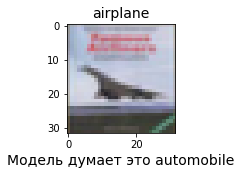

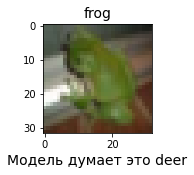

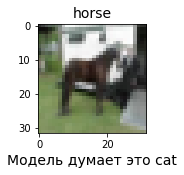

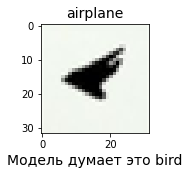

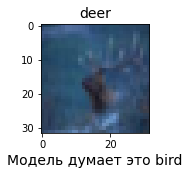

In [169]:
for index in false_detection_indexes[:5]:
    plot_sample(X_testRGB, y_test, y_pred_classes, index)

In [172]:
true_detection_indexes = np.where(y_pred_classes-y_test == 0)[0]
true_detection_indexes.shape

(6873,)

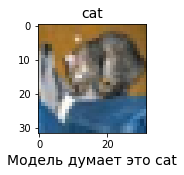

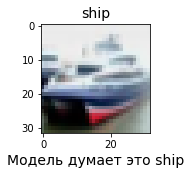

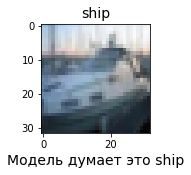

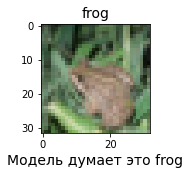

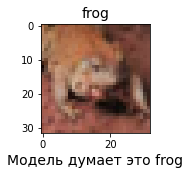

In [171]:
for index in true_detection_indexes[:5]:
    plot_sample(X_testRGB, y_test, y_pred_classes, index)